In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# The data analysis process

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [3]:
df = pd.read_csv('netflix_titles.csv',index_col='title')
df.head(5)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,
Dick Johnson Is Dead,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data cleaning

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
#replace blank countries with the mode (most common) country
df['country'] = df['country'].fillna(df['country'].mode()[0])

#Replace NAN values with 'No Data' for director and cast
df['cast'] = df['cast'].fillna('No Data')
df['director'] = df['director'].fillna('No Data')

In [6]:
df.isnull().sum()

show_id          0
type             0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, Dick Johnson Is Dead to Zubaan
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   director      8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [9]:
df["date_added"]

title
Dick Johnson Is Dead     September 25, 2021
Blood & Water            September 24, 2021
Ganglands                September 24, 2021
Jailbirds New Orleans    September 24, 2021
Kota Factory             September 24, 2021
                                ...        
Zodiac                    November 20, 2019
Zombie Dumb                    July 1, 2019
Zombieland                 November 1, 2019
Zoom                       January 11, 2020
Zubaan                        March 2, 2019
Name: date_added, Length: 8790, dtype: object

In [10]:
#Converting date_added coloumn to datetime type and adding month, month_name and year columns
df["date_added"] = pd.to_datetime(df['date_added'].str.strip())

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head(3)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
title,,,,,,,,,,,,,,
Dick Johnson Is Dead,s1,Movie,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
Blood & Water,s2,TV Show,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
Ganglands,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, Dick Johnson Is Dead to Zubaan
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   director          8790 non-null   object        
 3   cast              8790 non-null   object        
 4   country           8790 non-null   object        
 5   date_added        8790 non-null   datetime64[ns]
 6   release_year      8790 non-null   int64         
 7   rating            8790 non-null   object        
 8   duration          8790 non-null   object        
 9   listed_in         8790 non-null   object        
 10  description       8790 non-null   object        
 11  month_added       8790 non-null   int32         
 12  month_name_added  8790 non-null   object        
 13  year_added        8790 non-null   int32         
dtypes: datet

# Descriptive statistical analysis

In [12]:
# Separating movies from the Dataset
movies = df[df['type'] == 'Movie'].copy()

In [13]:
# Clean up and convert a duration column
movies['duration_minutes'] = movies['duration'].str.extract('(\\d+)').astype(float)

In [14]:
# Calculating summary statistics
movie_stats = movies[ 'duration_minutes'].describe()

In [15]:
# Printing results
print("🎬 DSA (Movies):\n")
print(movie_stats)

🎬 DSA (Movies):

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64


# Advanced analasis

In [16]:
# 1. Group by content type (Movie / TV Show)
print("📊 Number of titles by type:")
print(df.groupby('type').size())
print("\n" + "-"*40 + "\n")

📊 Number of titles by type:
type
Movie      6126
TV Show    2664
dtype: int64

----------------------------------------



In [17]:
# 2. Group by country – Top 10 countries with the most titles
print("🌍 Top 10 countries by number of titles:")
print(df.groupby('country').size().sort_values(ascending=False).head(10))
print("\n" + "-"*40 + "\n")

🌍 Top 10 countries by number of titles:
country
United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
dtype: int64

----------------------------------------



In [18]:
# 3. Group by release year – Most recent years
print("📅 Number of titles by release year:")
print(df.groupby('release_year').size().sort_index(ascending=False).head(10))
print("\n" + "-"*40 + "\n")

📅 Number of titles by release year:
release_year
2021     592
2020     953
2019    1030
2018    1146
2017    1030
2016     901
2015     555
2014     352
2013     286
2012     236
dtype: int64

----------------------------------------



In [19]:
# 4. Group by rating – Age rating distribution
print("🔞 Titles by age rating:")
print(df.groupby('rating').size().sort_values(ascending=False))
print("\n" + "-"*40 + "\n")

🔞 Titles by age rating:
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
dtype: int64

----------------------------------------



In [34]:
# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Group by year and month, counting titles added each month
monthly_trend = (
    df.groupby([df['date_added'].dt.year, df['date_added'].dt.month])
      .size()  # count titles per group
      .sort_index()
)

# --- Annual Trend ---
annual_trend = (
    df.groupby(df['date_added'].dt.year)
      .size()
      .sort_index()
)

# --- Monthly Trend ---
monthly_trend = (
    df.groupby([df['date_added'].dt.year, df['date_added'].dt.month])
      .size()
      .sort_index()
)

# Convert monthly_trend index to datetime for easier plotting
monthly_trend.index = pd.to_datetime(
    monthly_trend.index.map(lambda x: f"{x[0]}-{x[1]:02d}-01")
)

# --- Quarterly Trend ---
quarterly_trend = (
    df.groupby(pd.PeriodIndex(df['date_added'], freq='Q'))
      .size()
      .sort_index()
)

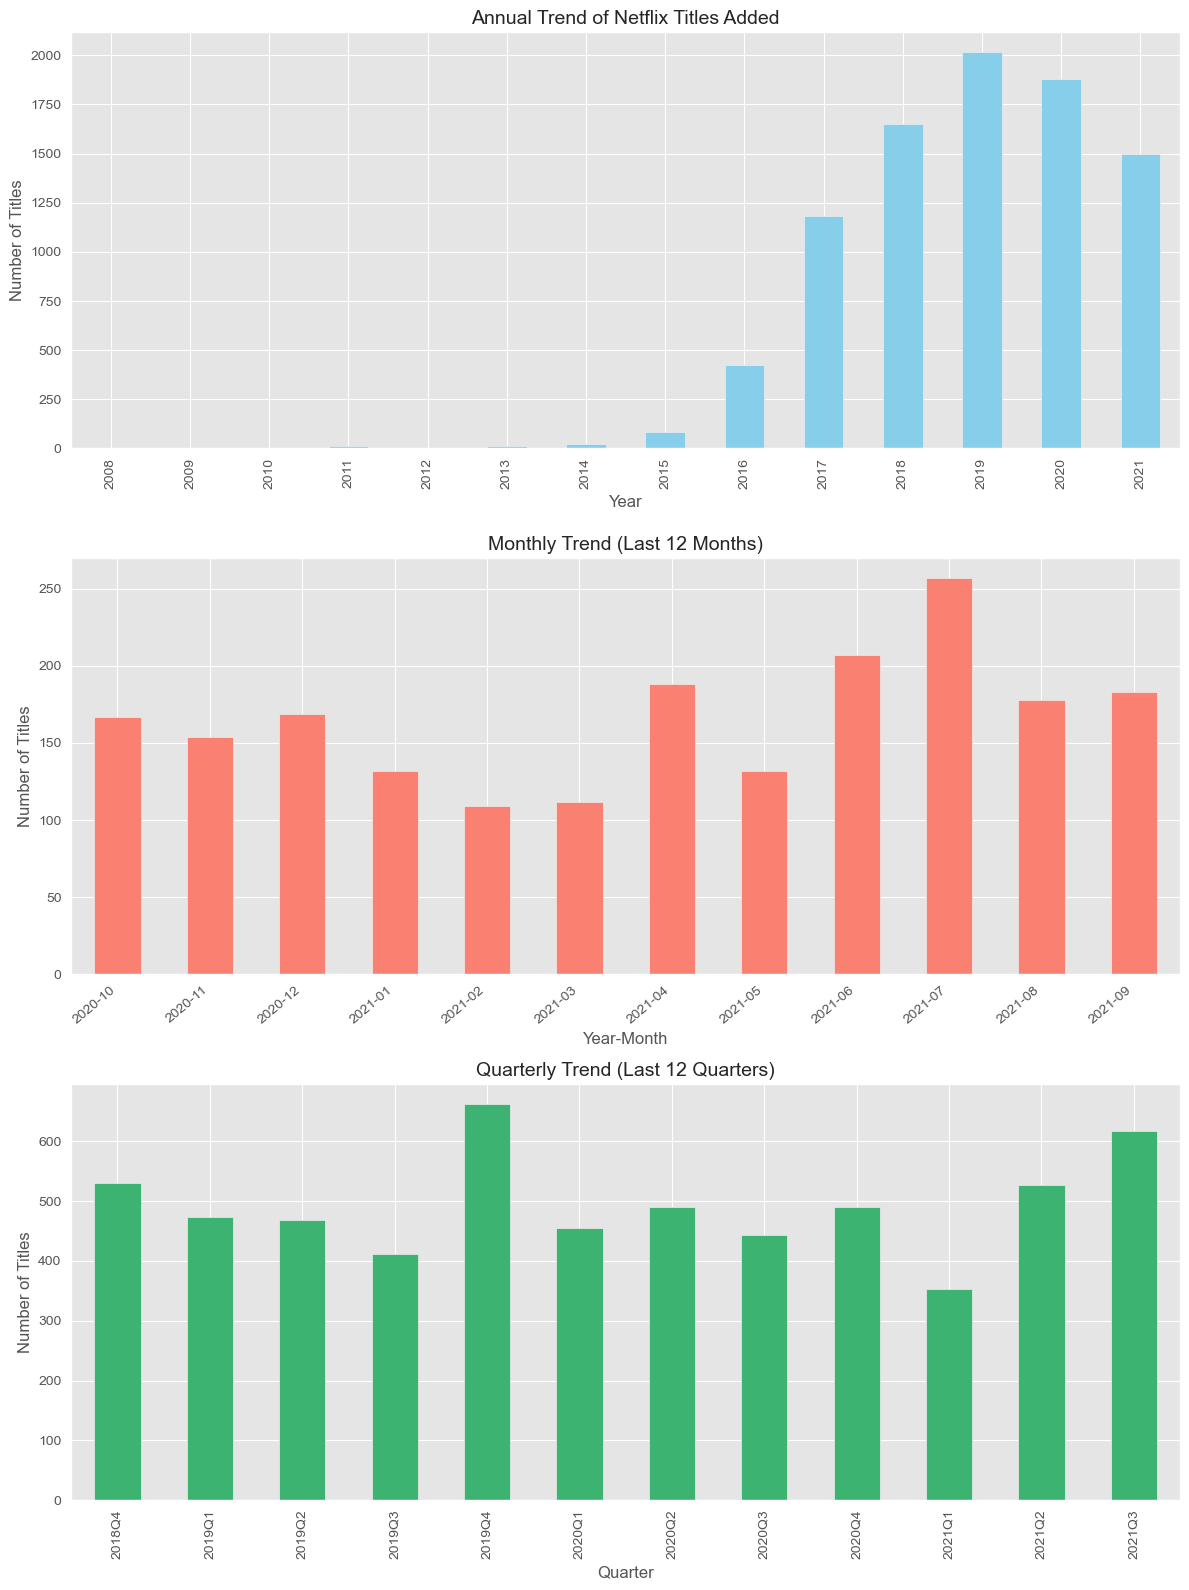

In [37]:
import matplotlib.pyplot as plt

# Use a ggplot style
plt.style.use('ggplot')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 16))

# --- Annual Trend ---
annual_trend.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Annual Trend of Netflix Titles Added', fontsize=14)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Titles')

# --- Monthly Trend (Last 12 months) ---
monthly_trend.tail(12).plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Monthly Trend (Last 12 Months)', fontsize=14)
axs[1].set_xlabel('Year-Month')
axs[1].set_ylabel('Number of Titles')
axs[1].set_xticklabels(
    [f"{ts.year}-{ts.month:02d}" for ts in monthly_trend.tail(12).index],
    rotation=40,
    ha='right'
)


# --- Quarterly Trend (Last 12 quarters) ---
quarterly_trend.tail(12).plot(kind='bar', ax=axs[2], color='mediumseagreen')
axs[2].set_title('Quarterly Trend (Last 12 Quarters)', fontsize=14)
axs[2].set_xlabel('Quarter')
axs[2].set_ylabel('Number of Titles')

# Layout adjustments
plt.tight_layout()
plt.show()



# Visualisation 


C:\Users\ameer\AppData\Local\Temp\ipykernel_17792\937228905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="coolwarm")


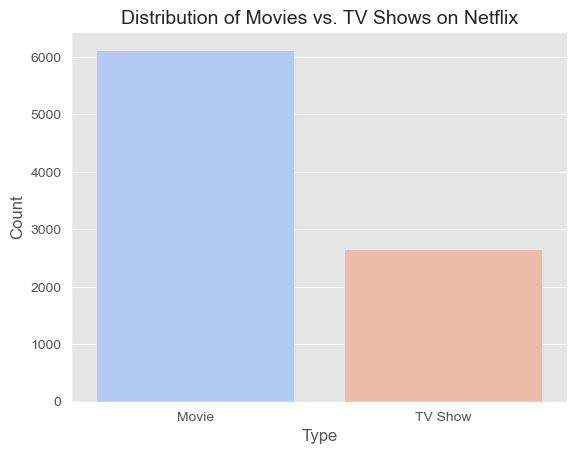

In [38]:
#df['type'].value_counts().plot(kind='bar')
sns.countplot(x='type', data=df, palette="coolwarm")
plt.title('Distribution of Movies vs. TV Shows on Netflix', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
df['count'] = 1
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=data.values, y=data.index, palette="magma")
plt.title('Top 10 Countries Producing Netflix Content', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [ ]:
df_5 = pd.DataFrame(data=df.groupby('rating').size()).reset_index()
df_5 = df_5.loc[~df_5['rating'].isin(['66 min', '74 min', '84 min'])]
df_5 = df_5.rename(columns={0: 'Number of content'})

fig = px.pie(df_5, values='Number of content', names='rating',
             color_discrete_sequence=px.colors.sequential.RdBu, title='Ratings for all content on Netflix')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'}

#creating a new column with age rating
df['Age rating'] = df['rating'].replace(to_replace = rating)
df_5 = pd.DataFrame(data=df.groupby('Age rating').size()).reset_index()
df_5 = df_5.loc[~df_5['Age rating'].isin(['66 min', '74 min', '84 min'])]
df_5 = df_5.rename(columns={0: 'Number of content'})

fig = px.pie(df_5, values='Number of content', names='Age rating',
             color_discrete_sequence=px.colors.sequential.RdBu, title='Ratings for all content on Netflix')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
#In Which Month Does Most of The Content Added To Platform?
#hypothesis - december
plt.figure(figsize=(10,6))
ByMonth = df['month_name_added'].value_counts().plot.bar()
plt.title('Content realesed by month', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of releases')
plt.show()

In [ ]:
#How many content is international?
plt.figure(figsize=(10,6))
content = df[['country']]
content['Num_countries'] = content['country'].apply(lambda x: len(x.split(',')))
num_countries = content['Num_countries'].value_counts()

# Create the bar plot
sns.barplot(x=num_countries.index, y=num_countries.values, palette="magma")

# Add data labels on top of each bar
for index, value in enumerate(num_countries.values):
    plt.text(index, value, str(value), ha='center', va='bottom')  # ha='center' centers the text

plt.title('Number of Countries per Content', fontsize=14)
plt.ylabel('Number of content')
plt.xlabel('')
plt.show()

In [ ]:
#create graph
movies = df.loc[(df.type=='Movie')]
x = movies['duration'].str.extract('(\d+)').astype(int)
sns.kdeplot(x)

# Add labels and title
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.title('KDE Plot of Movie Durations')
plt.show()


In [ ]:
data_dict1 = {'year_added': df.groupby('year_added').size().index,
             'n_content': df.groupby('year_added').size().values}

df_1 = pd.DataFrame(data=data_dict1, columns=['year_added', 'n_content'])

fig = px.line(df_1, x="year_added", y="n_content",
              title='Dynamics of adding content to Netflix by all countries',
              markers=True)

fig.update_layout(xaxis_title="Year",
                  yaxis_title="Number of content")

fig.show()

In [ ]:
df_tv_show = df.loc[df['type'] == 'TV Show']
df_tv_show['duration'] = df_tv_show['duration'].str.replace(' Seasons', ' Season')
df_tv_show['duration'] = df_tv_show['duration'].str.replace(' Season', ' Season(s)')


df_2 = pd.DataFrame(data=df_tv_show.groupby('duration').size().reset_index())
df_2.rename(columns={0: 'Number of TV Show'}, inplace=True)

fig = px.pie(df_2, values='Number of TV Show', names='duration',
             color_discrete_sequence=px.colors.sequential.RdBu, title='TV shows duration in Netflix')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# Count the occurrences of each unique entry in the 'listed_in' column
genre_counts = df['listed_in'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

In [ ]:
df['genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
genre_counts_movie = df['genres'].value_counts().reset_index()
genre_counts_movie.columns = ['genre', 'count']
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Content Genres')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_directors = df.groupby('director')['show_id'].count().sort_values(ascending=False)
#top_directors = top_directors[directors['director'] != 'No Data']
top_directors = top_directors.drop('No Data')
top_directors = top_directors.head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')
plt.title('Top 10 Directors Producing Netflix Content', fontsize=14)
plt.xlabel('Count')
plt.ylabel('')
plt.show()